<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
filename = 'm4_survey_data.sqlite'
urllib.request.urlretrieve(url, filename)

('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x111537d5988>)

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas, seaborn, and matplotlib modules.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0]) # iat: Access a single value for a row/column pair by integer position.
# this dataframe is a single row & column containing the query to create the columns for the master table

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# create dataframe of master table in sqlite database
QUERY = """
SELECT * FROM master
"""
master_df = pd.read_sql_query(QUERY, conn)
master_df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

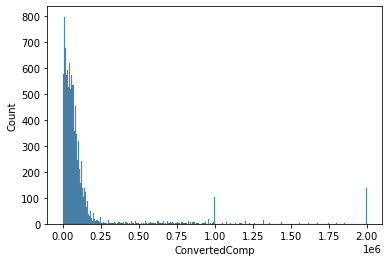

In [9]:
# create boxplot using the ConvertedComp column
sns.histplot(data=master_df['ConvertedComp'])

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

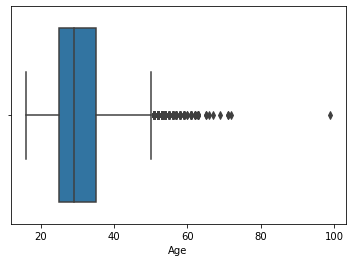

In [10]:
# create boxplot using the ConvertedComp column
sns.boxplot(x=master_df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

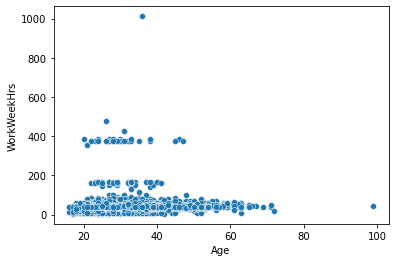

In [11]:
sns.scatterplot(data=master_df, x=master_df['Age'], y=master_df['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

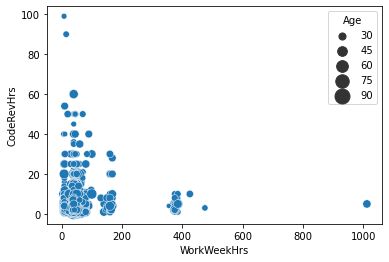

In [12]:
sns.scatterplot(data=master_df, x="WorkWeekHrs", y="CodeRevHrs", size="Age", sizes=(10, 250))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [13]:
QUERY="""
SELECT DatabaseDesireNextYear, Count(*) as 'Number of Respondents' FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
desired_database_df = pd.read_sql_query(QUERY,conn)
desired_database_df

,DatabaseDesireNextYear,Number of Respondents
0,Cassandra,1003
1,Couchbase,390
2,DynamoDB,1044
3,Elasticsearch,2856
4,Firebase,1650
5,MariaDB,1385
6,Microsoft SQL Server,2706
7,MongoDB,3649
8,MySQL,3281
9,Oracle,870


In [14]:
# select top 5 databases that respondents worked with
top_five_databases_desired = desired_database_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)
top_five_databases_desired

,DatabaseDesireNextYear,Number of Respondents
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


[Text(0.5, 0, 'Top Databases for Next Year'),
 Text(0, 0.5, 'Number of Respondents')]

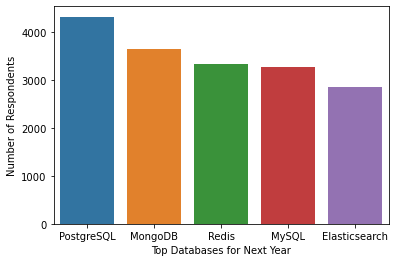

In [15]:
# create barchart for the above dataframe
ax = sns.barplot(data=top_five_databases_desired, x = 'DatabaseDesireNextYear', y = 'Number of Respondents')
ax.set(xlabel='Top Databases for Next Year', ylabel='Number of Respondents')

([<matplotlib.patches.Wedge at 0x1115d23b788>,
 [Text(-0.7731460869305188, 0.782460943602955, 'PostgreSQL'),
  Text(-0.8789062256395302, -0.6614558538043755, 'MongoDB'),
  Text(0.3578595814912377, -1.0401617758478325, 'Redis'),
  Text(1.0986951210330855, -0.05356333651009644, 'MySQL'),
  Text(0.5411414937298409, 0.9576877798968915, 'Elasticsearch')],
 [Text(-0.42171604741664653, 0.4267968783288845, '24.8%'),
  Text(-0.4794033958033801, -0.36079410207511386, '20.9%'),
  Text(0.1951961353588569, -0.5673609686442722, '19.1%'),
  Text(0.5992882478362284, -0.02921636536914351, '18.8%'),
  Text(0.2951680874890041, 0.5223751526710316, '16.4%')])

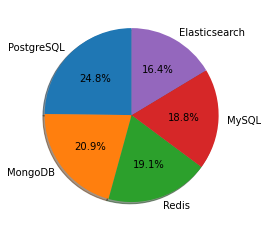

In [16]:
# create pie chart
plt.pie(top_five_databases_desired['Number of Respondents'], 
        labels=top_five_databases_desired['DatabaseDesireNextYear'], 
        autopct='%.1f%%',
        shadow=True, startangle=90)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [17]:
QUERY ="""
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age >= 30 AND Age <=35
"""
hours_df = pd.read_sql_query(QUERY, conn)
hours_df.dropna(axis=0, inplace=True)
print(hours_df)
print(hours_df.info())

      WorkWeekHrs  CodeRevHrs   Age
0             8.0         3.0  31.0
1            40.0         2.0  34.0
2            40.0         2.0  32.0
3            42.0        15.0  34.0
4            40.0         2.0  33.0
...           ...         ...   ...
2937         42.0         4.0  32.0
2938         50.0         2.0  32.0
2939         56.0        14.0  32.0
2940         40.0         5.0  34.0
2941         80.0         1.0  30.0

[2358 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 0 to 2941
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WorkWeekHrs  2358 non-null   float64
 1   CodeRevHrs   2358 non-null   float64
 2   Age          2358 non-null   float64
dtypes: float64(3)
memory usage: 73.7 KB
None


In [18]:
median_hours_df = hours_df.groupby(hours_df['Age'], as_index=False)[['WorkWeekHrs','CodeRevHrs']].median()
median_hours_df

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,4.0
1,31.0,40.0,4.0
2,32.0,40.0,4.0
3,33.0,40.0,4.0
4,34.0,40.0,4.0
5,35.0,40.0,4.0


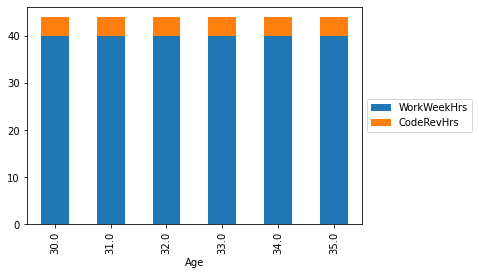

In [19]:
median_hours_df.plot(x='Age', kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

List the most popular languages respondents wish to learn in the next year

In [20]:
QUERY="""
SELECT LanguageDesireNextYear, Count(*) as 'Number of Respondents' FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
desired_lang_df = pd.read_sql_query(QUERY,conn)
desired_lang_df

,LanguageDesireNextYear,Number of Respondents
0,Assembly,336
1,Bash/Shell/PowerShell,3097
2,C,1028
3,C#,3591
4,C++,1633
5,Clojure,413
6,Dart,610
7,Elixir,620
8,Erlang,310
9,F#,621


In [21]:
# select top 5 languages that respondents desire to work with
top_five_lang_desired = desired_lang_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)
top_five_lang_desired

,LanguageDesireNextYear,Number of Respondents
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


[Text(0.5, 0, 'Top Languages for Next Year'),
 Text(0, 0.5, 'Number of Respondents')]

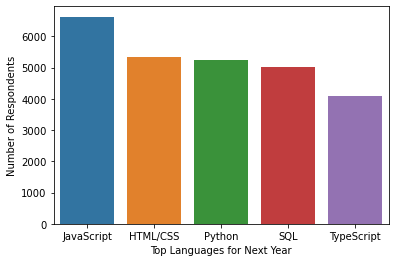

In [22]:
# create bar chart for the above dataframe
ax = sns.barplot(data=top_five_lang_desired, x = 'LanguageDesireNextYear', y = 'Number of Respondents')
ax.set(xlabel='Top Languages for Next Year', ylabel='Number of Respondents')

Find how many respondents use SQL

In [23]:
QUERY="""
SELECT LanguageWorkedWith, Count(*) as 'Number of Respondents' FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
lang_df = pd.read_sql_query(QUERY,conn)
lang_df

,LanguageWorkedWith,Number of Respondents
0,Assembly,437
1,Bash/Shell/PowerShell,4642
2,C,1578
3,C#,4288
4,C++,1946
5,Clojure,164
6,Dart,237
7,Elixir,187
8,Erlang,98
9,F#,158


In [24]:
# select SQL row to find number of respondents that work with SQL
sql_respondents = lang_df.loc[lang_df['LanguageWorkedWith'] == 'SQL']
sql_respondents

,LanguageWorkedWith,Number of Respondents
22,SQL,7106


In [25]:
# select top 5 languages that respondents work with
top_five_lang_work = lang_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)
top_five_lang_work

,LanguageWorkedWith,Number of Respondents
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'HTML/CSS'),
  Text(2, 0, 'SQL'),
  Text(3, 0, 'Bash/Shell/PowerShell'),
  Text(4, 0, 'Python')])

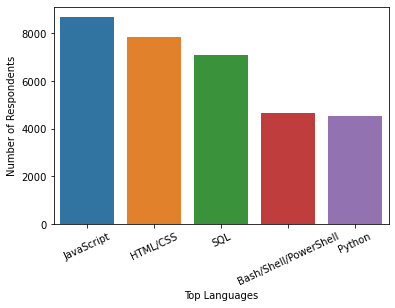

In [26]:
# create bar chart for the above dataframe
ax = sns.barplot(data=top_five_lang_work, x = 'LanguageWorkedWith', y = 'Number of Respondents')
ax.set(xlabel='Top Languages', ylabel='Number of Respondents')
plt.xticks(rotation=25)

Find the number of respondents that claim to work with MySQL **only**.

In [27]:
QUERY="""
SELECT * FROM DatabaseWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
db_df = pd.read_sql_query(QUERY,conn)
db_df

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [28]:
# drop all respondents that work with more than one database
no_dup_db_df = db_df.drop_duplicates(subset='Respondent', keep = False)
no_dup_db_df

,Respondent,DatabaseWorkedWith
32,25,MySQL
43,38,Microsoft SQL Server
102,70,Microsoft SQL Server
105,74,DynamoDB
106,75,MongoDB
...,...,...
31361,25128,SQLite
31369,25136,Microsoft SQL Server
31370,25137,MySQL
31371,25138,PostgreSQL


In [29]:
# find how many respondents only use MySQL
mysql_db_df = no_dup_db_df.loc[no_dup_db_df['DatabaseWorkedWith']  == 'MySQL']
print(f'Number of respondents that only use MySQL is: {mysql_db_df.shape[0]}')

Number of respondents that only use MySQL is: 474


Obtain top 5 databases that respondents work with

In [30]:
QUERY="""
SELECT DatabaseWorkedWith, Count(*) as 'Number of Respondents' FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
db_work_df = pd.read_sql_query(QUERY,conn)
db_work_df

,DatabaseWorkedWith,Number of Respondents
0,Cassandra,397
1,Couchbase,250
2,DynamoDB,831
3,Elasticsearch,1954
4,Firebase,1314
5,MariaDB,1709
6,Microsoft SQL Server,4110
7,MongoDB,3016
8,MySQL,5469
9,Oracle,1744


In [31]:
# Obtain top 5 databases that respondents work with
top_five_db_work_df = db_work_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)
top_five_db_work_df

,DatabaseWorkedWith,Number of Respondents
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MySQL'),
  Text(1, 0, 'Microsoft SQL Server'),
  Text(2, 0, 'PostgreSQL'),
  Text(3, 0, 'SQLite'),
  Text(4, 0, 'MongoDB')])

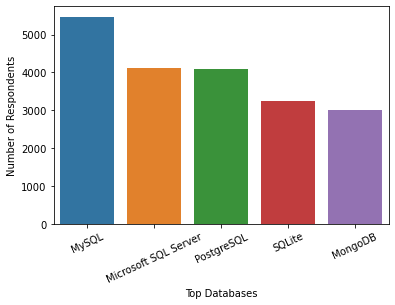

In [32]:
# create bar chart for the above dataframe
ax = sns.barplot(data=top_five_db_work_df, x = 'DatabaseWorkedWith', y = 'Number of Respondents')
ax.set(xlabel='Top Databases', ylabel='Number of Respondents')
plt.xticks(rotation=25)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [33]:
QUERY ="""
SELECT Respondent, ConvertedComp, Age FROM master
WHERE Age >= 45 AND Age <= 60
"""
comp_df = pd.read_sql_query(QUERY, conn)
comp_df.dropna(axis=0, inplace=True)
print(comp_df)
print(comp_df.info())

     Respondent  ConvertedComp   Age
0            22       103000.0  47.0
2           144        54996.0  47.0
3           164        62807.0  47.0
4           202        72522.0  45.0
5           234        54876.0  45.0
..          ...            ...   ...
594       25016        76339.0  45.0
595       25022        68705.0  46.0
596       25036       300000.0  48.0
597       25091        87668.0  50.0
598       25092        59652.0  50.0

[561 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 598
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent     561 non-null    int64  
 1   ConvertedComp  561 non-null    float64
 2   Age            561 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 17.5 KB
None


In [34]:
median_comp_df = comp_df.groupby(comp_df['Age'], as_index=False)['ConvertedComp'].median()
median_comp_df

,Age,ConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

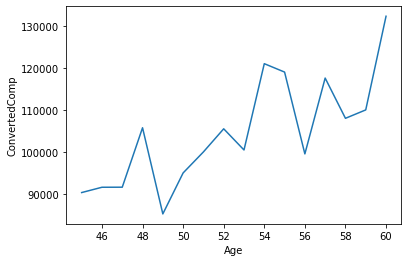

In [35]:
# create line chart using seaborn library
sns.lineplot(data = median_comp_df, x = 'Age', y= 'ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [36]:
QUERY = """
SELECT MainBranch FROM master
"""
mainbranch_df = pd.read_sql_query(QUERY, conn)
mainbranch_df

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession
...,...
11393,I am a developer by profession
11394,I am a developer by profession
11395,I am a developer by profession
11396,I am a developer by profession


<AxesSubplot:ylabel='MainBranch'>

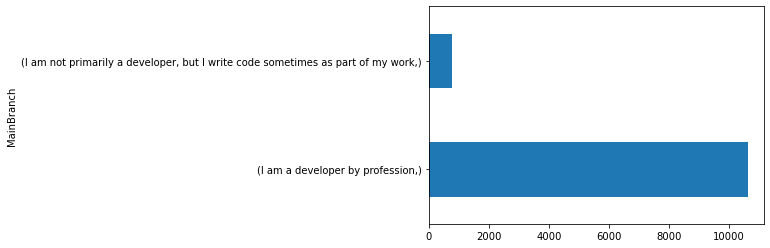

In [37]:
# create horizontal barchart using MainBranch data
mainbranch_df.value_counts().plot.barh()

Close the database connection.


In [38]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
